In [1]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
 
sys.path.append('../')

from functions import *

data = pd.read_csv("../../data/demeaned.csv")
data = data[["residual", "sellerfeedbackscore", "ispolice", "id"]]
data.sellerfeedbackscore = np.log(data.sellerfeedbackscore+1)

/Users/liumukun/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
import matplotlib.pyplot as plt

plt.style.use('tableau-colorblind10')
plt.rcParams['figure.figsize'] = (4,4)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['axes.titlepad'] = 10
plt.rcParams['axes.titleweight'] = 1000
plt.rcParams['axes.labelpad'] = 5
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.facecolor'] = 'white'

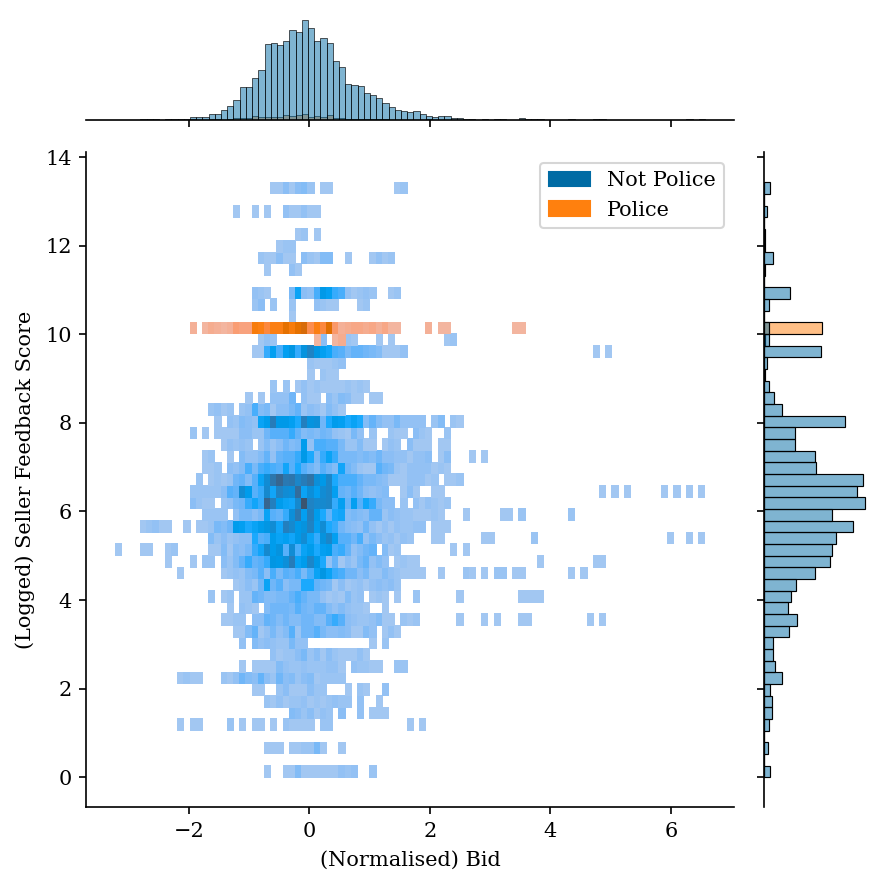

In [3]:
data = data.assign(_ispolice=data.ispolice.map({0: "Not Police", 1: "Police"}))
p = sns.jointplot(data=data, x="residual", y="sellerfeedbackscore", hue="_ispolice", kind="hist")

plt.xlabel("(Normalised) Bid")
plt.ylabel("(Logged) Seller Feedback Score")
ax = p.fig.gca()
ax.get_legend().set_title("")
p.fig.tight_layout()

p.fig.savefig("jointplot.jpeg", dpi=p.fig.dpi, bbox_inches='tight')